In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
len(set(df['Class']))

2

In [4]:
df.groupby("Class").Class.count()

Class
0    284315
1       492
Name: Class, dtype: int64

In [5]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

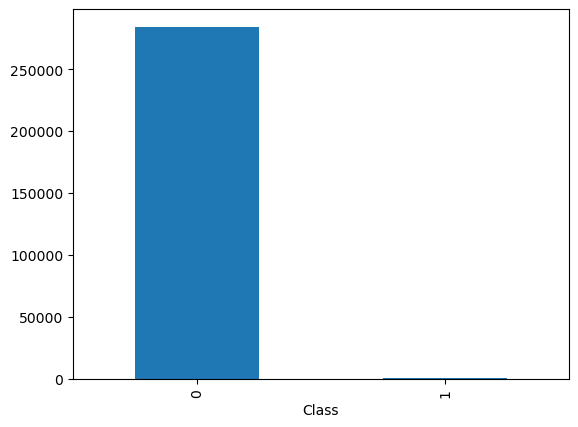

In [7]:
df.groupby("Class").Class.count().plot.bar()
plt.show()
# The plot shows that the dataset is highly imbalanced.

In [8]:
# Assigning real and fake data into two different dataframes
df_real = df[df.Class == 0]
df_fake = df[df.Class == 1]


In [13]:
# Upsampling the minor class i.e the fraud class
from sklearn.utils import resample
df_fake_upsampled = resample(df_fake, 
                                 replace=True,   
                                 n_samples=284315 , 
                                 random_state=42) 
df_new = pd.concat([df_fake_upsampled, df_real],axis=0)

In [15]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1


Class
0    284315
1    284315
Name: Class, dtype: int64


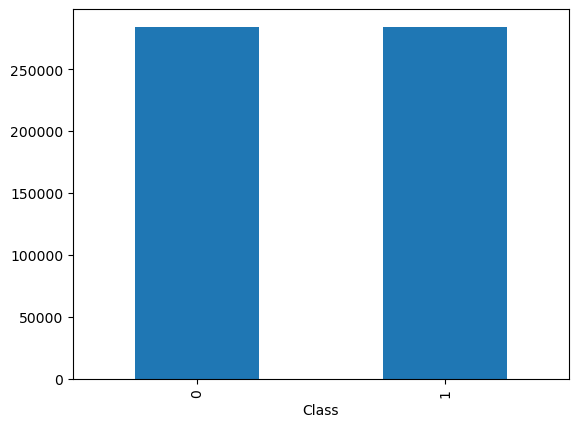

In [19]:
count = df_new.groupby('Class').Class.count()
print(count)
count.plot.bar()
plt.show()

# After upsampling the dataset, the bar chart below shows a balanced dataset.

In [20]:
df_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87749.312338,-2.385303,1.813584,-3.513309,2.265520,-1.577112,-0.695729,-2.782497,0.284445,-1.288140,...,0.357892,0.005644,-0.017998,-0.052984,0.021238,0.026035,0.086798,0.038676,104.914179,0.5
std,48158.104299,5.540865,3.724947,6.227465,3.201838,4.230174,1.761797,5.871405,4.914858,2.318459,...,2.820326,1.178186,1.192098,0.564551,0.673949,0.477169,1.014475,0.452605,252.634547,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,46057.000000,-2.866364,-0.145017,-5.118363,-0.106919,-1.796308,-1.574565,-3.103570,-0.203329,-2.309829,...,-0.169873,-0.539704,-0.239303,-0.401236,-0.316609,-0.287334,-0.062826,-0.058502,1.290000,0.0
50%,80173.500000,-0.773346,0.962831,-1.366354,1.311660,-0.428632,-0.645011,-0.645036,0.154612,-0.713189,...,0.148567,0.030003,-0.032977,0.005386,0.050678,-0.014642,0.049521,0.035075,18.960000,0.5
75%,134648.750000,1.042958,2.798780,0.341818,4.243069,0.478230,0.080154,0.268049,0.871461,0.170232,...,0.652683,0.576019,0.192916,0.371951,0.394081,0.323885,0.454982,0.219021,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


In [21]:
df_new.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80660.422419,-4.778863,3.633439,-7.038790,4.538901,-3.159677,-1.393876,-5.574631,0.569878,-2.580746,...,0.371808,0.717020,0.011313,-0.036066,-0.106151,0.042548,0.052160,0.173892,0.077484,121.537336


In [34]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
X = df_new.drop(columns='Class', axis=1)
Y = df_new['Class']
# Splitting the dataset in the ratio of 7:3
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

# Training the model using Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [23]:
# Calculating accuracy of the model
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)
print("Accuracy = ", accuracy_score(Y_test, prediction))

Accuracy =  0.9380851051357356


In [35]:
ytest = np.array(Y_test)
print(classification_report(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     85445
           1       0.96      0.91      0.94     85144

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589

